# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## 1: Business Understanding

### 1.1: Project Overview

In this project, I will Identify which demographic groups respond best to different offer types to optimize marketing strategies in the Starbucks rewards mobile app.

There are three types of promotions:

- discount
- bogo (buy one, get one free)
- informational - product advertisiment without any price off
Each offer is valid for certain number of days before it expires. Discounts and bogos have also different difficulty level, depending on how much the customer needs to spend in order to earn the promotion. Promotions are distributed via different multiple channels (social, web, email, mobile).

All transactions made through the app are tracked automatically. The app also records information about which offers have been sent, which have been viewed and which have been completed and when these three events happened.

---------



### 1.2: Problem Statement

To optimize the effectiveness of direct marketing campaigns, we aim to segment app users into distinct groups based on their responsiveness to different promotional offers. By leveraging K-means clustering techniques, we seek to identify patterns among users, distinguishing those who are more receptive to discounts, those who prefer buy-one-get-one (BOGO) offers, and those who show little interest in promotions. The ultimate goal is to tailor marketing messages to each segment, maximizing engagement and conversion rates

------ 

How can we leverage data science techniques to optimize direct marketing campaigns? Specifically, how can we segment app users into distinct groups based on their responsiveness to various promotional offers? By utilizing K-means clustering techniques, how can we identify patterns among users to differentiate between those who prefer discounts, those who favor buy-one-get-one (BOGO) offers, and those who exhibit minimal interest in promotions? Ultimately, how can we tailor marketing messages to each segment to maximize engagement and conversion rates?


### 1.3: Metrics: 
We are using: 
- confusion matrices 
- grid search 
- cross-validation

### 2: Data Understanding

The dataset is organized in three files:

-- portfolio.json (10 offers x 6 fields) - offer types sent during 30-day test period
-- profile.json (17000 users x 5 fields) - demographic profile of app users
-- transcript.json (306648 events x 4 fields) - event log on transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files, according to the information provided by Udacity, the schema is as follows:

-portfolio.json:
id (string) - offer id
offer_type (string) - type of offer ie BOGO, discount, informational
difficulty (int) - minimum required spend to complete an offer
reward (int) - reward given for completing an offer
duration (int) - time for offer to be open, in days
channels (list of strings)

-profile.json:
age (int) - age of the customer
became_member_on (int) - date when customer created an app account
gender (str) - gender of the customer
id (str) - customer id
income (float) - customer's income

-transcript.json:
event (str) - record description (ie transaction, offer received, offer viewed, etc.)
person (str) - customer id
time (int) - time in hours since start of test. The data begins at time t=0
value - (dict of strings) - either an offer id or transaction amount depending on the record

### 2.1: Data Exploration 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
% matplotlib inline


# Load and read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)


#### 1.1: Portoflio 

In [3]:
# Here, no need to use ( .head) method, as portfolio data has only 10 rows 
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


Good news!! there no null or missing values in portfolio dataset :) hence we won't have to impute them or make any other process during the data preparation phase. 

In [5]:
#check no. of unique offers
portfolio.id.nunique()

10

In [6]:
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

There are 10 unique offer IDs, distributed with four of Bug one-Get one (BOGO), four discount types, and two for informational types.

#### 1.2: Profile

In [7]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


We can already see some null values in gender and income coloumns, while the age column contains some values that don't make sense, for example: (118)

In [8]:
profile.shape

(17000, 5)

In [9]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


As shown, we can see that the exact number of NULL values in gender column are the same in income column, which counts for 2175 null valus out of 17000 

In [10]:
#check how many unique people are in dataset
print(f"there are {profile['id'].nunique()} unique customers in profile")

there are 17000 unique customers in profile


In [11]:
#check count of age=118 value and corresponding gender and income columns
print(profile[profile['age']==118].count())
profile[['gender','income','age']][profile['age']==118]

age                 2175
became_member_on    2175
gender                 0
id                  2175
income                 0
dtype: int64


,gender,income,age
0,None,NaN,118
2,None,NaN,118
4,None,NaN,118
6,None,NaN,118
7,None,NaN,118
9,None,NaN,118
10,None,NaN,118
11,None,NaN,118
17,None,NaN,118
23,None,NaN,118


From the observation above, it's obvious that the age=118 column aligns with the null values in both the gender and income columns. So, during preprocessing, we may remove these values if they represent only a small portion of our dataset.

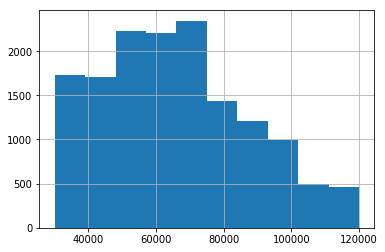

In [12]:
#check distributions of income
profile.income.hist()

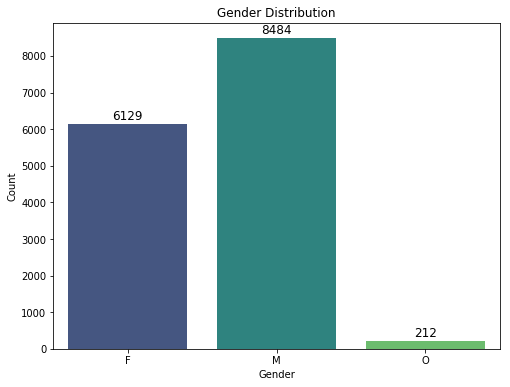

In [13]:
# Check Gender column distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=profile, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add the counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', 
                fontsize = 12, color = 'black', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

As shown, we have 14825 number of volumes distrbuted between Female, Male, O. 
Highest number of values goes to Male segment, while "O" segment i think it means the total number for those who choose "prefer not to answer" 

In [14]:
# Check the summary statistics of the income column 
profile['income'].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

I wanted to show summary of incom column as this will help me in determine bins for the income ranges that will be used in showing Income Distribution. 

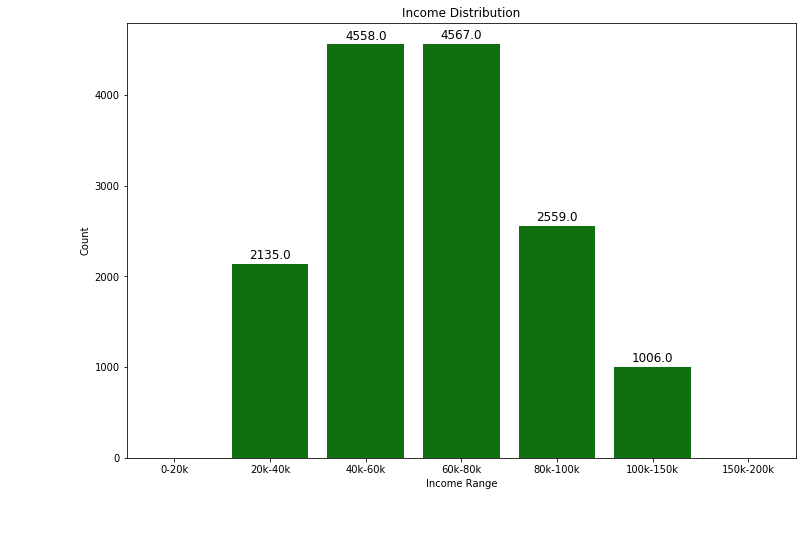

In [15]:
#Income distribution

# Create bins for the income ranges
bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k-200k']
profile['income_bin'] = pd.cut(profile['income'], bins=bins, labels=labels)

# Plot the bar plot with annotations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='income_bin', data=profile, color='green')
plt.title('Income Distribution')
plt.xlabel('Income Range')
plt.ylabel('Count')

# Add count annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

We can see above that the count of (40K-60K) and (60K-80K) income ranges are approximately the same.

In [16]:
# renaming 'id' column to 'person' in profile dataset, so it will help us in mergeing the datasets in later stages
profile_cleaned = profile.copy()
profile_cleaned.rename(columns={profile_cleaned.columns[3]:'person'}, inplace=True)
#Change type of 'became_member_on' column from int to time 
profile_cleaned.became_member_on = pd.to_datetime(profile_cleaned.became_member_on.astype(str), format="%Y/%m/%d")

In [17]:
profile_cleaned = profile.copy()

In [18]:
# Rename the column
profile_cleaned.rename(columns={profile_cleaned.columns[3]: 'person'}, inplace=True)

In [19]:
#Change type of 'became_member_on' column from int to time 
profile_cleaned.became_member_on = pd.to_datetime(profile_cleaned.became_member_on.astype(str), format="%Y/%m/%d")

In [20]:
# Check the result
profile_cleaned.head()

,age,became_member_on,gender,person,income,income_bin
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,100k-150k
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,NaN
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,80k-100k
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,NaN


We can that income_bin column has been addedd to make it easier for processing in later stages 

In [21]:
# Missing values in 'gender' column are recorded as NoneType, in 'income' column - as NaNs. 
type(profile_cleaned.gender[0]), type(profile_cleaned.income[0])

(NoneType, numpy.float64)

In [22]:
# let's replace NoneType with Nans in gender column for standardiztion 
profile_cleaned.gender.fillna(value=np.nan, inplace=True)
#checking the results 
type(profile_cleaned.gender[0]), type(profile.income[0])

(float, numpy.float64)

In [23]:
# Replace 118 with Nans in age column 
profile_cleaned.age.replace(118, np.nan, inplace=True)

# lets check the results after processing
profile_cleaned.head()

,age,became_member_on,gender,person,income,income_bin
0,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,100k-150k
2,NaN,2018-07-12,NaN,38fe809add3b4fcf9315a9694bb96ff5,NaN,NaN
3,75.0,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,80k-100k
4,NaN,2017-08-04,NaN,a03223e636434f42ac4c3df47e8bac43,NaN,NaN


### 1.3: Transcript

In [24]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [25]:
transcript.shape

(306534, 4)

In [26]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [27]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


As shown, there are no null values in Transcript dataset, but we need to further check value column if it contains missing or inconsistent data as pandas method does not check for specific invalid or placeholder values in object (such as empty strings, special characters, or other non-null values) that might represent missing or unknown data in the categorical columns. 

In [28]:
# Check for Empty Strings or Specific Value, For example: ()'NA', 'unknown') might represent missing data
print(f"Empty strings in 'value': {transcript['value'].eq('').sum()}")
print(f"'Unknown' in 'value': {transcript['value'].eq('unknown').sum()}")
print(f"'O' in 'value': {transcript['value'].eq('O').sum()}")  

Empty strings in 'value': 0
'Unknown' in 'value': 0
'O' in 'value': 0


In [29]:
print(transcript['value'].value_counts(dropna=False))

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}                  14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                  14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                  14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}                  14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}                  14374
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}                  14305
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  11848
{'offer id': '3f207df678b143eea3cee63160fa8bed'}                  11761
{'offer id': '2906b810c7d4411798c6938adc9daaa5'}                  11750
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                  10331
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}      5317
{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}      5156
{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}      4354
{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}   

It seems like the value column in transcript dataset contains a mix of values with offer IDs and amounts, which represent different types of events such as offer received, offer viewed, offer completed, and transactions.

To handle this, below we will perform further preprocessing to extract meaningful information from the value column.

In [30]:
# Extract offer_id and amount from value column
transcript_cleaned = transcript.copy()  # Make a copy of the original transcript dataframe
transcript_cleaned['offer_id'] = transcript_cleaned['value'].apply(lambda x: x.get('offer id') if isinstance(x, dict) and 'offer id' in x else None)
transcript_cleaned['amount'] = transcript_cleaned['value'].apply(lambda x: x.get('amount') if isinstance(x, dict) and 'amount' in x else None)

# Check the updated transcript dataframe
transcript_cleaned.head()

,event,person,time,value,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


As shown, the amount column is showing NaN values, I think because not all rows in the original value column contained transaction amounts. Only rows where the event is a transaction, for example: ('transaction' event) have transaction amounts, while rows corresponding to offer events have an offer ID instead.

The amount column would be considered as containing numerical values, as it represents the transaction amounts. However, currently, the column may have mixed data types (both numerical values and NaNs), which could be addressed through data cleaning and preprocessing phases.

In [31]:
#check number of unique people represented
transcript_cleaned['person'].nunique() # Number of unique customers

17000

It looks as though the number of people in transcript are the same as the number of people in the Demographics Data, so that is good news. 

In [32]:
#check for null values
transcript_cleaned.isnull().sum()

event            0
person           0
time             0
value            0
offer_id    172532
amount      167581
dtype: int64

As shown above, it appears there are still large number of null values in  offer_id and amount columns. 
We will address these by trying to investigate which event types have missing values

In [33]:
# Check null values across different event types
null_summary = transcript_cleaned.groupby('event').apply(lambda x: x.isnull().sum())
print(null_summary)

                 event  person  time  value  offer_id  amount
event                                                        
offer completed      0       0     0      0     33579   33579
offer received       0       0     0      0         0   76277
offer viewed         0       0     0      0         0   57725
transaction          0       0     0      0    138953       0


As shown above, there are missing values but we will address them later in preprocessing stages 

In [34]:
# Display unique 'offer_id' values
print(transcript_cleaned['value'].apply(lambda x: x.get('offer id', '')).unique())

['9b98b8c7a33c4b65b9aebfe6a799e6d9' '0b1e1539f2cc45b7b9fa7c272da2e1d7'
 '2906b810c7d4411798c6938adc9daaa5' 'fafdcd668e3743c1bb461111dcafc2a4'
 '4d5c57ea9a6940dd891ad53e9dbe8da0' 'f19421c1d4aa40978ebb69ca19b0e20d'
 '2298d6c36e964ae4a3e7e9706d1fb8c2' '3f207df678b143eea3cee63160fa8bed'
 'ae264e3637204a6fb9bb56bc8210ddfd' '5a8bc65990b245e5a138643cd4eb9837' '']


That is could be an indicator of how starbucks strategies are working well regarding "new cutsomer acquisition".
In the other hand, it also can be an indicator of how well they can keep their customers. 

In [35]:
# Display unique 'amount' values
print(transcript['value'].apply(lambda x: x.get('amount', 0)).unique())

[   0.      0.83   34.56 ...,  685.07  405.04  476.33]


In [36]:
# Unique values in 'event' column
print(transcript_cleaned['event'].value_counts())

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64


In [37]:
print(f"experiment lasted for max {transcript.time.max()/24} days")

experiment lasted for max 29.75 days


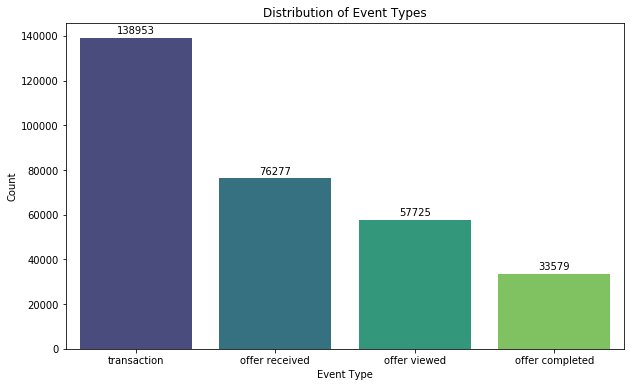

In [38]:
# Distribution of event types
event_counts = transcript['event'].value_counts()

# Plot the distribution of event types
plt.figure(figsize=(10, 6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')

# Add total number above each bar
for i, count in enumerate(event_counts.values):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [39]:
transcript_cleaned.head()

,event,person,time,value,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


### Combining datasets

In [40]:
# checking the number of rows in the datasets Profile and 
profile_cleaned.shape, transcript_cleaned.shape
print(f'Number of rows & columns in Profile: {profile_cleaned.shape}')
print(f'Number of rows & columns in Transcript: { transcript_cleaned.shape}')

Number of rows & columns in Profile: (17000, 6)
Number of rows & columns in Transcript: (306534, 6)


It seems that the transcipt has more rows that Profile

In [41]:
# Display column names of profile_cleaned DataFrame
print(profile_cleaned.columns)

# Display column names of transcript_cleaned DataFrame
print(transcript_cleaned.columns)

# Display column names of transcript_cleaned DataFrame
print(portfolio.columns)

Index(['age', 'became_member_on', 'gender', 'person', 'income', 'income_bin'], dtype='object')
Index(['event', 'person', 'time', 'value', 'offer_id', 'amount'], dtype='object')
Index(['channels', 'difficulty', 'duration', 'id', 'offer_type', 'reward'], dtype='object')


In [42]:
# Merge datasets on the appropriate keys
starbucks_merged = transcript_cleaned.merge(profile_cleaned, on='person', how='left')
starbucks_final = starbucks_merged.merge(portfolio, left_on='offer_id', right_on='id', how='left')

# Drop the redundant 'id' column after merging
starbucks_final.drop(columns=['id'], inplace=True)

We dropped id column as it has identical values with "offer id" column

In [43]:
# show merged dataset
starbucks_final.head()

,event,person,time,value,offer_id,amount,age,became_member_on,gender,income,income_bin,channels,difficulty,duration,offer_type,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,F,100000.0,80k-100k,"[web, email, mobile]",5.0,7.0,bogo,5.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,2017-08-04,NaN,NaN,NaN,"[web, email]",20.0,10.0,discount,5.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,68.0,2018-04-26,M,70000.0,60k-80k,"[web, email, mobile]",10.0,7.0,discount,2.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,2017-09-25,NaN,NaN,NaN,"[web, email, mobile, social]",10.0,10.0,discount,2.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,2017-10-02,NaN,NaN,NaN,"[web, email, mobile, social]",10.0,5.0,bogo,10.0


In [44]:
starbucks_final.shape

(306534, 16)

In [45]:
# Check the columns to ensure we are removing the correct one
print(starbucks_final.columns)

Index(['event', 'person', 'time', 'value', 'offer_id', 'amount', 'age',
       'became_member_on', 'gender', 'income', 'income_bin', 'channels',
       'difficulty', 'duration', 'offer_type', 'reward'],
      dtype='object')


The pd.get_dummies() function in pandas is used to convert categorical variables into dummy/indicator variables. It creates a new DataFrame with binary indicator variables for each category in the specified columns.

In your code, you're applying pd.get_dummies() to the DataFrame starbucks with the columns 'event' and 'offer_type'. This means that for each unique category in these columns, new columns will be created with binary values indicating the presence or absence of that category.

In [46]:
# Create dummy variables for the 'event' column
starbucks_final = pd.get_dummies(starbucks_final, columns=['event'])

# Create dummy variables for the 'offer_type' column
starbuck_final = pd.get_dummies(starbucks_final, columns=['offer_type'])

In [47]:
starbucks_final.head()

,person,time,value,offer_id,amount,age,became_member_on,gender,income,income_bin,channels,difficulty,duration,offer_type,reward,event_offer completed,event_offer received,event_offer viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,F,100000.0,80k-100k,"[web, email, mobile]",5.0,7.0,bogo,5.0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,2017-08-04,NaN,NaN,NaN,"[web, email]",20.0,10.0,discount,5.0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,68.0,2018-04-26,M,70000.0,60k-80k,"[web, email, mobile]",10.0,7.0,discount,2.0,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,2017-09-25,NaN,NaN,NaN,"[web, email, mobile, social]",10.0,10.0,discount,2.0,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,2017-10-02,NaN,NaN,NaN,"[web, email, mobile, social]",10.0,5.0,bogo,10.0,0,1,0,0


In [48]:
# Let's took a little deeper look into the dataset
starbucks_final

,person,time,value,offer_id,amount,age,became_member_on,gender,income,income_bin,channels,difficulty,duration,offer_type,reward,event_offer completed,event_offer received,event_offer viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,F,100000.0,80k-100k,"[web, email, mobile]",5.0,7.0,bogo,5.0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,2017-08-04,NaN,NaN,NaN,"[web, email]",20.0,10.0,discount,5.0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,68.0,2018-04-26,M,70000.0,60k-80k,"[web, email, mobile]",10.0,7.0,discount,2.0,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,2017-09-25,NaN,NaN,NaN,"[web, email, mobile, social]",10.0,10.0,discount,2.0,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,2017-10-02,NaN,NaN,NaN,"[web, email, mobile, social]",10.0,5.0,bogo,10.0,0,1,0,0
5,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,NaN,65.0,2018-02-09,M,53000.0,40k-60k,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,0,1,0,0
6,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,2017-08-24,NaN,NaN,NaN,"[web, email, mobile, social]",7.0,7.0,discount,3.0,0,1,0,0
7,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,NaN,58.0,2017-11-11,M,51000.0,40k-60k,"[web, email, mobile]",0.0,4.0,informational,0.0,0,1,0,0
8,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,61.0,2017-09-11,F,57000.0,40k-60k,"[web, email]",20.0,10.0,discount,5.0,0,1,0,0
9,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,62.0,2016-02-11,F,71000.0,60k-80k,"[web, email]",20.0,10.0,discount,5.0,0,1,0,0


In [49]:
starbucks_final.shape

(306534, 19)

### 3.Data Perparation

#### 3.1 Pre-processing and handling missing values 

In [50]:
# Check the total number of missing values in the Dataset
total_missing = starbucks_final.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 1337861


In [51]:
# Check the missing values per column
missing_per_column = starbucks_final.isnull().sum()
print("\nMissing values per column:")
print(missing_per_column)


Missing values per column:
person                        0
time                          0
value                         0
offer_id                 172532
amount                   167581
age                       33772
became_member_on              0
gender                    33772
income                    33772
income_bin                33772
channels                 172532
difficulty               172532
duration                 172532
offer_type               172532
reward                   172532
event_offer completed         0
event_offer received          0
event_offer viewed            0
event_transaction             0
dtype: int64


In [52]:
# Check the percentage of missing values in the Dataset
total_elements = starbucks_final.size
percent_missing = (total_missing/total_elements) * 100
print(f"Percentage of missing values: {percent_missing:.2f}%")

Percentage of missing values: 22.97%


with 22.97% of missing values in a dataset of 306,534 rows, that is considered a significant percentage of missing data. 

In [53]:
# Handle missing values
starbucks_final_imputed = starbucks_final.fillna(starbucks_final.mean())

In [54]:
# Verify that there are no more missing values
print("Missing values after imputation:")
print(starbucks_final_imputed.isnull().sum())

Missing values after imputation:
person                        0
time                          0
value                         0
offer_id                 172532
amount                        0
age                           0
became_member_on              0
gender                    33772
income                        0
income_bin                33772
channels                 172532
difficulty                    0
duration                      0
offer_type               172532
reward                        0
event_offer completed         0
event_offer received          0
event_offer viewed            0
event_transaction             0
dtype: int64


 let's analyze the missing values after imputation:
 - Offer_id, channels, offer_type: These columns have 172,532 missing values.
 - gender, income_bin: These columns have 33,772 missing values.
 - Amount: This column has no missing values, which is good.

Now we will explore the unique values in the gender column and then decide how to encode it.

In [55]:
# Explore the unique values in the gender column
print(starbucks_final['gender'].unique())

['F' nan 'M' 'O']


Now after we explore the unique values in gender column, we will first handle the missing values by replacing them with a placeholder value, and then perform the label encoding.

In [56]:
# Handle missing values in the gender column
starbucks_final['gender'] = starbucks_final['gender'].fillna('unknown')

In [57]:
# Use get_dummies to convert 'gender' column to numerical values
starbucks_final = pd.get_dummies(starbucks_final, columns=['gender'], prefix='gender', drop_first=True)

In [59]:
# Check for missing values
print(starbucks_final.isnull().sum())

person                        0
time                          0
value                         0
offer_id                 172532
amount                   167581
age                       33772
became_member_on              0
income                    33772
income_bin                33772
channels                 172532
difficulty               172532
duration                 172532
offer_type               172532
reward                   172532
event_offer completed         0
event_offer received          0
event_offer viewed            0
event_transaction             0
gender_M                      0
gender_O                      0
gender_unknown                0
dtype: int64


The discrepancy in the missing values for the 'amount' column is likely due to the subsequent processing or data manipulation steps, some new missing values may have been introduced in the 'amount' column.

I think When you handlde the missing values in the 'age' and 'income_bin' columns, it could have resulted in some rows being dropped or modified, which in turn might have introduced missing values in the 'amount' column.

In [60]:
# Numeric columns
numeric_cols = ['duration', 'amount', 'reward']
for col in numeric_cols:
    starbucks_final[col] = starbucks_final[col].fillna(starbucks_final[col].mean())

In [61]:
# Handle 'age' column
starbucks_final['age'] = starbucks_final['age'].fillna(starbucks_final['age'].mean())

In [62]:
# Drop the 'income_bin' column
starbucks_final = starbucks_final.drop('income_bin', axis=1)

In [63]:
# Drop the 'value' column
starbucks_final = starbucks_final.drop('value', axis=1)

In [64]:
# Drop the 'income' column
starbucks_final = starbucks_final.drop('income', axis=1)

By dropping the 'income', 'value' columns, we'll avoid potential redundancy and multicollinearity issues in later stages.

In [65]:
# Categorical columns
categorical_cols = ['offer_id', 'difficulty', 'offer_type']
for col in categorical_cols:
    starbucks_final[col] = starbucks_final[col].fillna(starbucks_final[col].mode().iloc[0])

In [66]:
# Check the unique values in the 'offer_type' column
print(starbucks_final['offer_type'].unique())

['bogo' 'discount' 'informational']


In [67]:
# Identify the categorical columns
categorical_cols = ['offer_type']

In [68]:
# Create a one-hot encoded DataFrame
encoded_df = pd.get_dummies(starbucks_final[categorical_cols], prefix=categorical_cols)

In [69]:
# Concatenate the encoded features with the original DataFrame
starbucks_final = pd.concat([starbucks_final, encoded_df], axis=1)

In [70]:
# Drop the 'offer type' column
starbucks_final = starbucks_final.drop('offer_type', axis=1)

In [71]:
# Handle 'channels' column
def fill_channels(row):
    if isinstance(row['channels'], list):
        if pd.isna(row['channels']).all():
            return ['web', 'email']
        else:
            return row['channels']
    else:
        if pd.isna(row['channels']):
            return ['web', 'email']
        else:
            return [row['channels']]

starbucks_final['channels'] = starbucks_final.apply(fill_channels, axis=1)

In [72]:
channels_dummies = starbucks_final['channels'].str.get_dummies(sep=', ')

In [74]:
# Concatenate our Dataset with the one-hot encoded columns
starbucks_final = pd.concat([starbucks_final, channels_dummies], axis=1)

In [75]:
# Drop the original 'channels' column
starbucks_final = starbucks_final.drop('channels', axis=1)

In [76]:
# Combining the encoded columns with the original dataframe
starbucks_final = pd.concat([starbucks_final, channels_dummies], axis=1)

In [77]:
# Drop the 'person' column
starbucks_final = starbucks_final.drop('person', axis=1)

In [78]:
# Verify if all missing values are now handled
print(starbucks_final.isnull().sum())

time                        0
offer_id                    0
amount                      0
age                         0
became_member_on            0
difficulty                  0
duration                    0
reward                      0
event_offer completed       0
event_offer received        0
event_offer viewed          0
event_transaction           0
gender_M                    0
gender_O                    0
gender_unknown              0
offer_type_bogo             0
offer_type_discount         0
offer_type_informational    0
'email'                     0
'email']                    0
'mobile'                    0
'mobile']                   0
'social']                   0
['email'                    0
['web'                      0
'email'                     0
'email']                    0
'mobile'                    0
'mobile']                   0
'social']                   0
['email'                    0
['web'                      0
'email'                     0
'email']  

In [79]:
# Check the data types of the columns
print(starbucks_final.dtypes)

time                                 int64
offer_id                            object
amount                             float64
age                                float64
became_member_on            datetime64[ns]
difficulty                         float64
duration                           float64
reward                             float64
event_offer completed                uint8
event_offer received                 uint8
event_offer viewed                   uint8
event_transaction                    uint8
gender_M                             uint8
gender_O                             uint8
gender_unknown                       uint8
offer_type_bogo                      uint8
offer_type_discount                  uint8
offer_type_informational             uint8
'email'                              int64
'email']                             int64
'mobile'                             int64
'mobile']                            int64
'social']                            int64
['email'   

In [80]:
# let's check the dataset after processing
starbucks_final.head()

,time,offer_id,amount,age,became_member_on,difficulty,duration,reward,event_offer completed,event_offer received,...,'social'],['email',['web','email','email'],'mobile','mobile'],'social'],['email',['web'
0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,12.777356,75.000000,2017-05-09,5.0,7.0,5.0,0,1,...,0,0,1,1,0,0,1,0,0,1
1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,12.777356,53.840696,2017-08-04,20.0,10.0,5.0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2906b810c7d4411798c6938adc9daaa5,12.777356,68.000000,2018-04-26,10.0,7.0,2.0,0,1,...,0,0,1,1,0,0,1,0,0,1
3,0,fafdcd668e3743c1bb461111dcafc2a4,12.777356,53.840696,2017-09-25,10.0,10.0,2.0,0,1,...,1,0,1,1,0,1,0,1,0,1
4,0,4d5c57ea9a6940dd891ad53e9dbe8da0,12.777356,53.840696,2017-10-02,10.0,5.0,10.0,0,1,...,1,0,1,1,0,1,0,1,0,1


In [81]:
numeric_cols = ['time', 'amount', 'age', 'difficulty', 'duration', 'reward']

In [82]:
# Standardize the numeric features
scaler = StandardScaler()
starbucks_final[numeric_cols] = scaler.fit_transform(starbucks_final[numeric_cols])

# The dataframe now has the standardized numeric features
print(starbucks_final.head())

       time                          offer_id        amount           age  \
0 -1.828934  9b98b8c7a33c4b65b9aebfe6a799e6d9 -8.721761e-17  1.278025e+00   
1 -1.828934  0b1e1539f2cc45b7b9fa7c272da2e1d7 -8.721761e-17 -4.291689e-16   
2 -1.828934  2906b810c7d4411798c6938adc9daaa5 -8.721761e-17  8.552240e-01   
3 -1.828934  fafdcd668e3743c1bb461111dcafc2a4 -8.721761e-17 -4.291689e-16   
4 -1.828934  4d5c57ea9a6940dd891ad53e9dbe8da0 -8.721761e-17 -4.291689e-16   

  became_member_on  difficulty  duration    reward  event_offer completed  \
0       2017-05-09   -1.071102  0.394229  0.305367                      0   
1       2017-08-04    3.043451  2.474326  0.305367                      0   
2       2018-04-26    0.300415  0.394229 -1.000682                      0   
3       2017-09-25    0.300415  2.474326 -1.000682                      0   
4       2017-10-02    0.300415 -0.992502  2.482115                      0   

   event_offer received   ...    'social']  ['email'  ['web'  'email'  \
0

Let's go through this step-by-step:

- time: This column is of type int64, which means it contains integer values.
- offer_id: This column is of type object, which typically indicates it contains string or text data.
- amount: This column is of type float64, which means it contains floating-point numerical values.
- age: This column is also of type float64, containing floating-point numerical values.
- became_member_on: This column is of type datetime64[ns], which means it contains datetime data.
- difficulty: This column is of type float64, containing floating-point numerical values.
- duration: This column is of type float64, containing floating-point numerical values.
- reward: This column is of type float64, containing floating-point numerical values.
- event_offer completed, event_offer received, event_offer viewed, event_transaction: These columns are of type uint8, which     means they contain unsigned 8-bit integer values (0 to 255).
- gender_encoded: This column is of type int64, containing integer values.
- offer_type_bogo, offer_type_discount, offer_type_informational: These columns are of type uint8, containing unsigned 8-bit    integer values.
- ['email', 'email'], ['mobile', 'mobile'], ['social'], ['email', ['web'] These column names are a bit unusual and may be the result of the one-hot encoding process. They are of type int64, containing integer values.

#### 3.2 Feature engineering 

To segment users based on their responsiveness to offers, we will focus on the following features:

- For User Characteristics: age, gender, income, income_bin, became_member_on
- For Offer Characteristics: difficulty, duration, offer_type, reward
- For User Interactions with Offers:
Event Types: event (encoded as categorical variables)
Transaction Amount: amount
Channels: channels (encoded as categorical variables)

In [83]:
# Calculate membership duration in days
starbucks_final['membership_duration'] = (pd.to_datetime('2024-05-24') - starbucks_final['became_member_on']).dt.days

In [84]:
# Check the columns after one-hot encoding
print(starbucks_final.columns)

Index(['time', 'offer_id', 'amount', 'age', 'became_member_on', 'difficulty',
       'duration', 'reward', 'event_offer completed', 'event_offer received',
       'event_offer viewed', 'event_transaction', 'gender_M', 'gender_O',
       'gender_unknown', 'offer_type_bogo', 'offer_type_discount',
       'offer_type_informational', ''email'', ''email']', ''mobile'',
       ''mobile']', ''social']', '['email'', '['web'', ''email'', ''email']',
       ''mobile'', ''mobile']', ''social']', '['email'', '['web'', ''email'',
       ''email']', ''mobile'', ''mobile']', ''social']', '['email'', '['web'',
       'membership_duration'],
      dtype='object')


In [85]:
# Select numeric columns
numeric_features = starbucks_final.select_dtypes(include=[np.number])

In [86]:
# Verify that there are no missing values in the numeric features
missing_values = numeric_features.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Great! The output above confirms that there are no missing values in the numeric features of starbucks_final DataFrame.

In [87]:
starbucks_final_processed = starbucks_final.copy()

#### 3.3 Exploratory Data Analysis (EDA)
Now will conduct (EDA) because it allows us to verify that the preprocessing steps have been applied correctly and have not introduced any unexpected issues or biases into the data. Overall, conducting EDA at this stage can help for better understanding for the information that will be used for modeling and decision-making.

In [88]:
# Load the final processed DataFrame
starbucks_final = pd.read_csv('starbucks_final_processed.csv')

In [89]:
# Show basic information about the Dataset
print(starbucks_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 31 columns):
person                      272762 non-null object
time                        272762 non-null float64
value                       272762 non-null object
amount                      272762 non-null float64
age                         272762 non-null float64
became_member_on            272762 non-null object
income                      272762 non-null float64
difficulty                  272762 non-null float64
duration                    272762 non-null float64
reward                      272762 non-null float64
event_offer completed       272762 non-null float64
event_offer received        272762 non-null float64
event_offer viewed          272762 non-null float64
event_transaction           272762 non-null float64
offer_type_bogo             272762 non-null float64
offer_type_discount         272762 non-null float64
offer_type_informational    272762 non-null float64
web     

Overall, the dataset seems to be well-prepared for further analysis and modeling, with no missing values :)

In [90]:
# Show descriptive statistics for numeric columns
starbucks_final.describe().T

,count,mean,std,min,25%,50%,75%,max
time,272762.0,0.000153,0.941868,-1.830256,-7.521893e-01,1.530952e-04,7.151788e-01,1.733353
amount,272762.0,0.000895,0.946088,-0.282580,-2.825802e-01,-2.523703e-01,2.573860e-02,46.910639
age,272762.0,-0.001242,0.942459,-2.042053,-6.176576e-01,-1.241705e-03,5.788347e-01,2.686940
income,272762.0,0.000507,0.942522,-1.616336,-6.748817e-01,5.067490e-04,5.019364e-01,2.620209
difficulty,272762.0,0.000477,0.942049,-2.214549,5.249554e-16,5.249554e-16,4.767432e-04,3.695923
duration,272762.0,0.000531,0.942315,-2.405390,0.000000e+00,0.000000e+00,5.307859e-04,2.500941
reward,272762.0,-0.000205,0.942430,-1.893325,-2.047175e-04,3.909435e-16,3.909435e-16,2.508308
event_offer completed,272762.0,-0.001525,0.940945,-0.367430,-3.674295e-01,-3.674295e-01,-3.674295e-01,2.721610
event_offer received,272762.0,0.001754,0.943624,-0.567813,-5.678133e-01,-5.678133e-01,1.753508e-03,1.761142
event_offer viewed,272762.0,-0.002123,0.940993,-0.472954,-4.729543e-01,-4.729543e-01,-2.123235e-03,2.114369


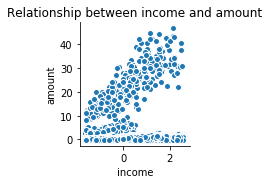

In [91]:
# Select the variables we want to explore
x_var = 'income'
y_var = 'amount'

# Create the pairplot
plt.figure(figsize=(8, 8))
sns.pairplot(starbucks_final, x_vars=[x_var], y_vars=[y_var], kind='scatter')
plt.title(f'Relationship between {x_var} and {y_var}')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()

As it shows above, the overall interpretation is: 
- Positive Correlation: The upward sloping scatter of points indicates a positive correlation between income and amount. This means that as a person's income increases, the amount they spend or transact also tends to increase.
- Strength of Correlation: The tightness or compactness of the points around the trend line suggests a fairly strong positive correlation between the two variables. This implies a consistent, linear relationship.

The correlation coefficient between age and amount is: 0.04


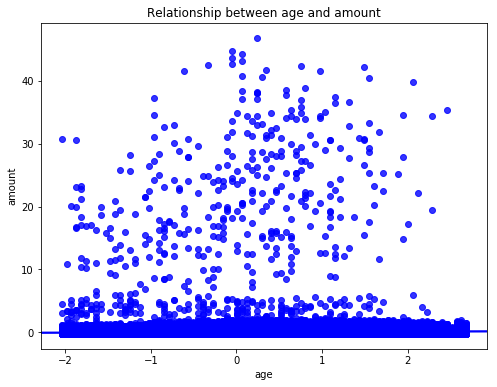

In [92]:
# Choose two variables to investigate the relationship
x_var = 'age'
y_var = 'amount'

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=x_var, y=y_var, data=starbucks_final, scatter=True, color='blue')

# Add labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title(f'Relationship between {x_var} and {y_var}')

# Calculate the correlation coefficient
correlation = starbucks_final[x_var].corr(starbucks_final[y_var])
print(f'The correlation coefficient between {x_var} and {y_var} is: {correlation:.2f}')

# Show the plot
plt.show()

The value 0.04 suggests a very weak positive linear relationship between age and amount.

### 4.Modelling

#### 4.1: Model Selection

In [93]:
# Load the data
starbucks_final = pd.read_csv('starbucks_final_processed.csv')

In [94]:
# Select features for clustering 
# We will exclude categorical and non-relevant columns such as 'person'
features = starbucks_final.drop(columns=['person', 'became_member_on', 'value'])

In [95]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [96]:
# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

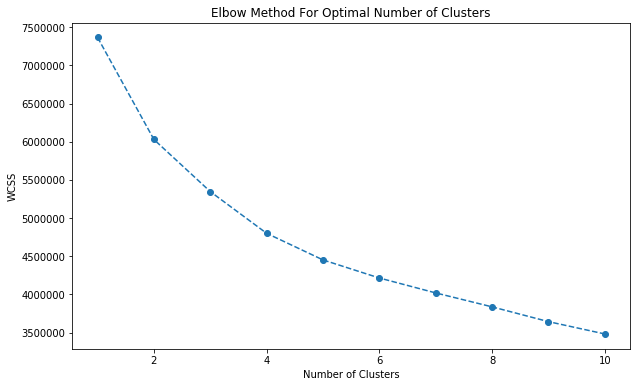

In [97]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In general, If the number of clusters is too high, it might result in overfitting, where the model captures noise rather than meaningful patterns in the data. Conversely, if the number of clusters is too low, important distinctions between groups of data points might be overlooked.
Based on the output, I will go with 4 number of clusters. 

In [98]:
optimal_clusters = 4
# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [99]:
# Add the cluster labels to the original DataFrame
starbucks_final['cluster'] = kmeans.labels_

In [100]:
# Analyze the clustering results
print(starbucks_final['cluster'].value_counts())

1    169384
2     43113
3     40165
0     20100
Name: cluster, dtype: int64


As it shown, we have 4 clusters which are:

- Cluster 0: 20,100 data points
- Cluster 1: 169,384 data points
- Cluster 2: 43,113 data points
- Cluster 3: 40,165 data points

These counts indicate how many data points belong to each cluster after clustering.

In [101]:
# Calculate the mean or median values for each feature in each cluster
cluster_descriptions = starbucks_final.groupby('cluster').mean()  # You can also use .median()

# Display the cluster descriptions
print(cluster_descriptions)

             time    amount       age    income  difficulty  duration  \
cluster                                                                 
0       -0.115403 -0.282580  0.039996  0.053092   -2.214549 -2.091482   
1        0.071949  0.173906 -0.023501 -0.034919    0.000086  0.000095   
2       -0.114707 -0.282580  0.026975  0.052973    0.039527 -0.346523   
3       -0.121506 -0.282580  0.041706  0.067273    1.068688  1.421812   

           reward  event_offer completed  event_offer received  \
cluster                                                          
0       -1.893325              -0.367430              0.798276   
1       -0.000037               0.221793             -0.465608   
2        1.463975              -0.367430              0.711862   
3       -0.625175              -0.367430              0.811875   

         event_offer viewed    ...     gender_encoded  membership_duration  \
cluster                        ...                                           
0       

Here's a brief interpretation of some of the key features:

- time: It seems that clusters 0, 2, and 3 tend to have similar average time values, while cluster 1 has a slightly higher average time value.
- amount: Clusters 0, 2, and 3 have similar average transaction amounts, while cluster 1 has a higher average amount.
- age: There is not much variation in average age across clusters.
- income: Clusters 0, 2, and 3 have similar average income levels, while cluster 1 has a slightly lower average income.
- reward: Cluster 2 has a significantly higher average reward value compared to other clusters.
- gender_M: There is not much variation in the proportion of males across clusters.

In [102]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to your dataframe
starbucks_final['cluster'] = cluster_labels

In [103]:
# Get the cluster centers
centroids = kmeans.cluster_centers_

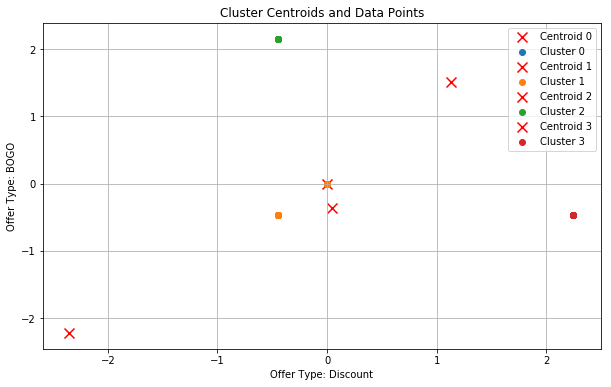

In [104]:
# Plotting the centroids and data points
plt.figure(figsize=(10, 6))

# Iterate over each cluster
for i in range(optimal_clusters):
    # Filter data points belonging to the current cluster
    cluster_data = starbucks_final[starbucks_final['cluster'] == i]
    # Plot the centroid of the current cluster
    centroid = centroids[i]
    plt.scatter(centroid[4], centroid[5], marker='x', color='red', s=100, label=f'Centroid {i}')
    # Plot the data points of the current cluster
    plt.scatter(cluster_data['offer_type_discount'], cluster_data['offer_type_bogo'], label=f'Cluster {i}')

# Adding labels and title
plt.xlabel('Offer Type: Discount')
plt.ylabel('Offer Type: BOGO')
plt.title('Cluster Centroids and Data Points')

# Showing the plot
plt.legend()
plt.grid(True)
plt.show()

This is informative! but in a nutshell, we can see that cluster 3 represents a group of customers who are more responsive to discount offers compared to BOGO offers. The negative value on the BOGO axis might indicate that these customers are less likely to respond to or engage with BOGO offers compared to other clusters.

### 4.2: Model Tuning

In [105]:
# Load the final processed DataFrame
starbucks_final = pd.read_csv('starbucks_final_processed.csv')

Given our goal of optimizing direct marketing campaigns, we should focus on features that directly relate to user behavior and responsiveness to promotional offers. 

Here are some alternative features that could be insightful for clustering:

- Event_ Offer Viewed: Indicates whether the user has viewed the offers.
- Even_Offer Completed: Indicates whether the user has completed the offers.
- Amount Spent: Indicates how much the user has spent in transactions.
- Income: Reflects the user's income level which might affect their responsiveness to different types of offers.

We can use these features to understand how users who engage with offers and spend more differ from those who do not. but now Let's use event_offer viewed and amount as the new features for clustering and visualization.

In [119]:
# selecting features
features = ['event_offer viewed', 'amount']

In [120]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(starbucks_final[features])

In [121]:
# Determine the optimal number of clusters 
optimal_clusters = 4 

# K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original dataframe
starbucks_final['cluster'] = kmeans.labels_

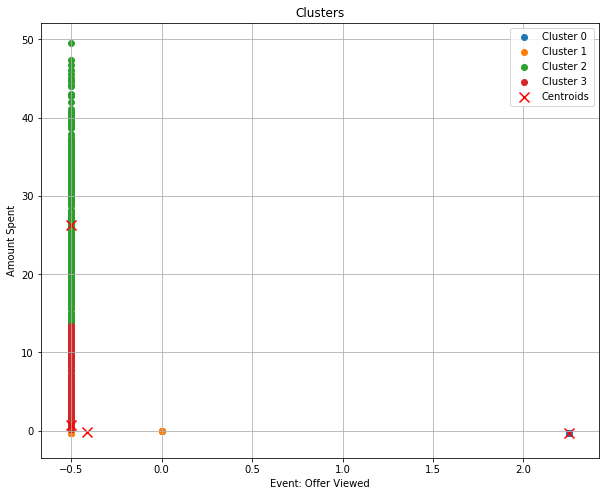

In [123]:
# Visualize the clusters
plt.figure(figsize=(10, 8))

# Plot each cluster
for i in range(optimal_clusters):
    # Filter data points belonging to the current cluster
    cluster_data = scaled_features[starbucks_final['cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100, label='Centroids')

# Adding labels and title
plt.xlabel('Event: Offer Viewed')
plt.ylabel('Amount Spent')
plt.title('Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Identify the cluster with high offer views and zero spending
specific_cluster = starbucks_final[(starbucks_final['event_offer viewed'] > 2) & (starbucks_final['amount'] == 0)]['cluster'].unique()

As shown above, a general interpretation of the output is:

Cluster Zero: High Offer Views, No Spending:
Cluster Characteristics: This cluster represents users who frequently view offers (high event_offer viewed value around 2.5) but do not spend any money (amount spent value is 0).
Centroid Position: The centroid of this cluster is directly above these data points, indicating that the average characteristics of users in this cluster align with viewing offers frequently but not making any purchases.

### 4.3: Model Evaluation 

We will use Cluster Descriptive Statistics that summarizes the mean values of the features for each cluster, giving insights into the characteristics of each cluster because Helps in understanding the key characteristics and differences between clusters based on the selected features.

In [124]:
# Add cluster labels to the original dataframe
starbucks_final['cluster'] = kmeans.labels_

In [125]:
# Descriptive statistics for each cluster
cluster_summary = starbucks_final.groupby('cluster').agg(['mean', 'std'])
print(cluster_summary)


             time               amount                 age            \
             mean       std       mean       std      mean       std   
cluster                                                                
0       -0.058341  0.994404  -0.282580  0.000000  0.042256  0.974670   
1       -0.004262  0.907587  -0.161770  0.150642 -0.071552  0.934239   
2        0.195590  1.036378  24.833328  8.075434  0.115906  0.956760   
3        0.065599  1.006381   0.678857  0.493475  0.207436  0.908764   

           income              difficulty              ...     \
             mean       std          mean       std    ...      
cluster                                                ...      
0        0.071462  0.991156 -8.777064e-02  1.367544    ...      
1       -0.166901  0.877460  2.250207e-02  0.946073    ...      
2        0.396513  0.948581  5.249554e-16  0.000000    ...      
3        0.525147  0.918511  5.249554e-16  0.000000    ...      

        income_bin_100k-150k           

In [126]:
# Features to be used for clustering
features = ['event_offer viewed', 'amount']

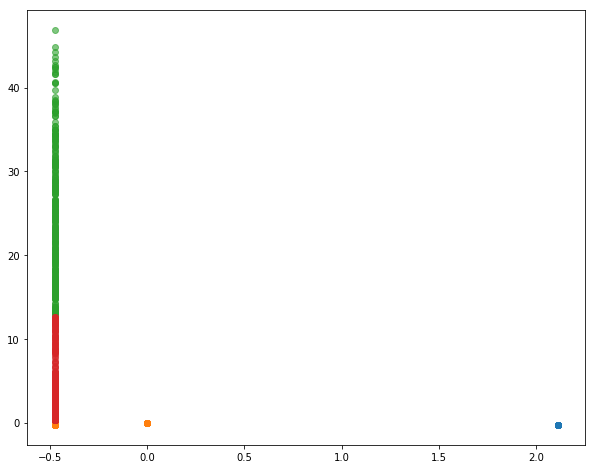

In [127]:
# Scatter plot of clusters
plt.figure(figsize=(10, 8))

# Plot each cluster
for i in range(optimal_clusters):
    cluster_data = starbucks_final[starbucks_final['cluster'] == i]
    plt.scatter(cluster_data[features[0]], cluster_data[features[1]], label=f'Cluster {i}', alpha=0.6)

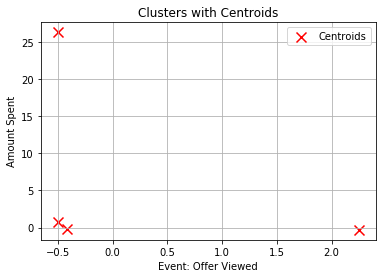

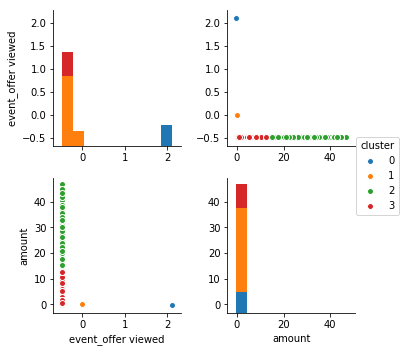

In [128]:
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100, label='Centroids')

# Adding labels and title
plt.xlabel('Event: Offer Viewed')
plt.ylabel('Amount Spent')
plt.title('Clusters with Centroids')
plt.legend()
plt.grid(True)
plt.show()

# Pair plot for visual inspection
sns.pairplot(starbucks_final, hue='cluster', vars=features)
plt.show()

Based on the provided descriptive statistics for each cluster, here's an assessment of the clustering result:

- Time, Amount, and Age: The mean values for these attributes show some variation across clusters, indicating that the clusters may represent different groups of users in terms of their transaction behavior, age, and possibly time spent on the platform.

- Income: There's noticeable variation in income across clusters, suggesting that the clusters may capture different income groups among users.

- Offer Difficulty and Duration: It appears that clusters 2 and 3 have very low values for offer difficulty and duration, which could indicate a distinct group of users who tend to interact with offers that are easier to complete and have shorter durations.

- Gender Distribution: The gender distribution seems relatively consistent across clusters, with minor variations.

- Offer Interaction: Cluster 0 has the highest mean value for offer interaction, suggesting that users in this cluster are more engaged with offers compared to users in other clusters.

In summary, the clustering result provides valuable insights into user segmentation.

###  References:

#### Resources: 
    - for K-means overview: https://dataheroes.ai/blog/comparing-customer-segmentation-techniques-kmeans-vs-kmeans-coreset-from-dataheroes/
    - Centroids: https://www.analyticsvidhya.com/blog/2021/01/a-simple-guide-to-centroid-based-clustering-with-python-code/
    - K-means model tuning: https://www.kaggle.com/code/diegohurtadoo/customer-segmentation-kmeans-parameter-tuning
    - EDA K-means: https://www.codecademy.com/article/eda-prior-to-unsupervised-clustering 
    - Get_dummies in Pandas: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
    - Handle numerical missing values Unsing Pandas: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
    
    